        TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]
-----------------------------------------------------------------------


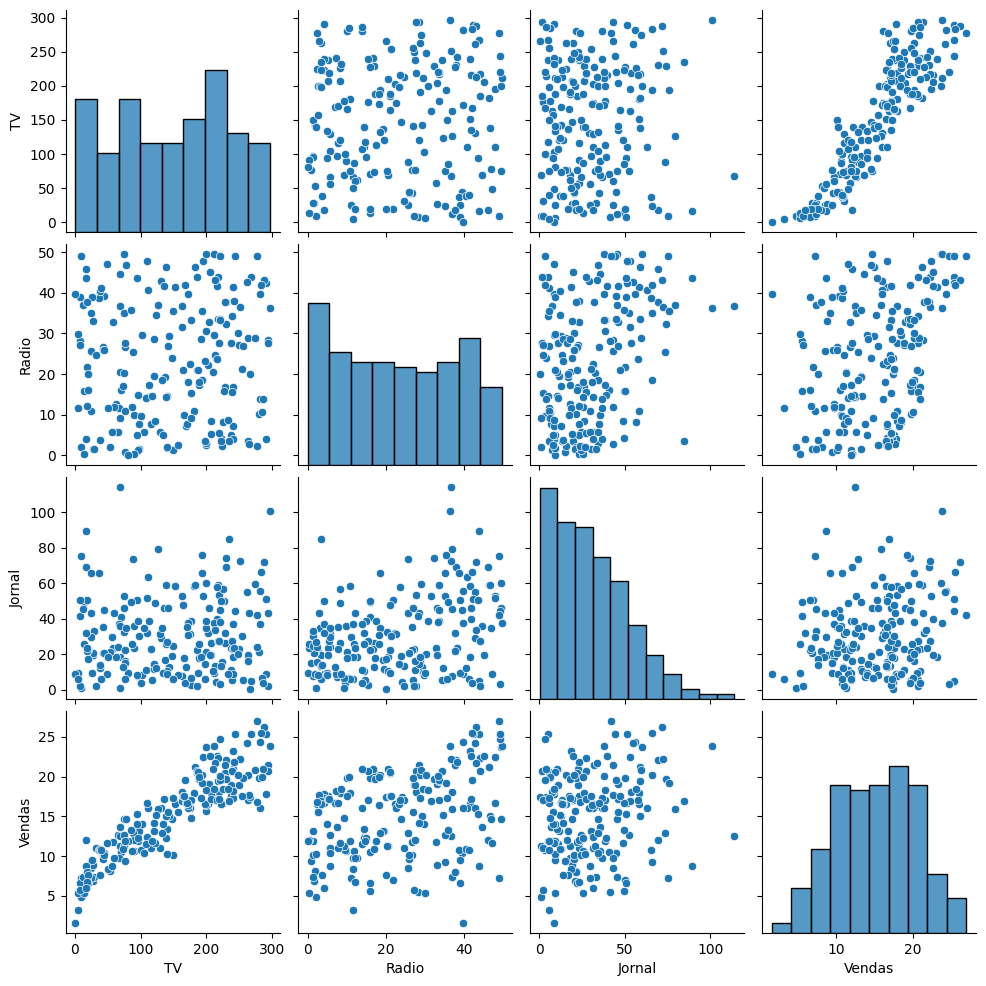

-----------------------------------------------------------------------


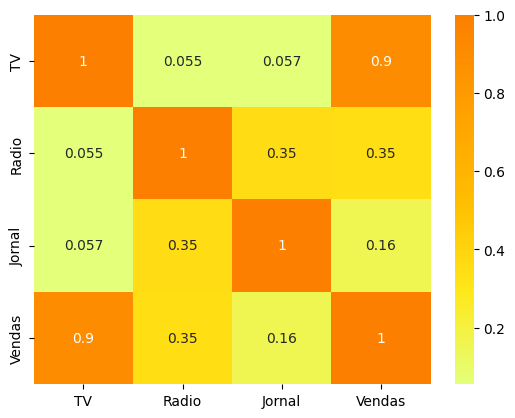

-----------------------------------------------------------------------
R² da Regressão Linear: 0.9071151423684273
RSME da Regressão Linear: 1.5396947656031237
R² da Random Forest: 0.9634133146222232
RSME da Random Forest: 0.9663260923035588
-----------------------------------------------------------------------


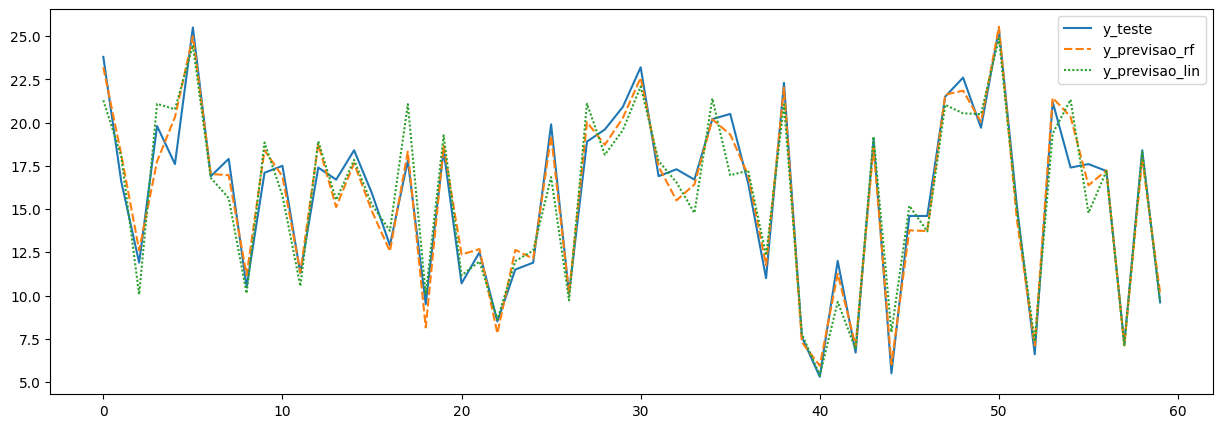

-----------------------------------------------------------------------


,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.193,21.288161
1,16.6,18.161,18.042132
2,11.9,12.612,10.059590
3,19.8,17.755,21.082241
4,17.6,20.315,20.764760
5,25.5,24.987,24.471874
6,16.9,17.024,16.806436
7,17.9,16.958,15.628857
8,10.5,11.177,10.124799
9,17.1,18.397,18.846019


-----------------------------------------------------------------------


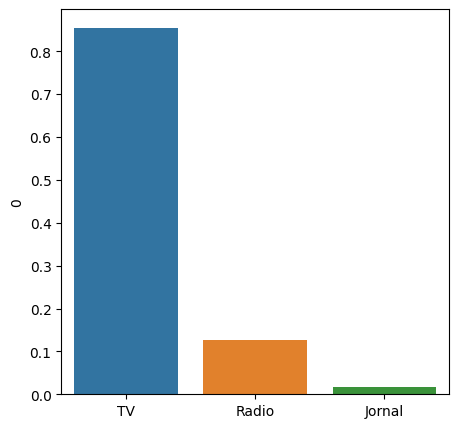

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

url = "https://drive.google.com/uc?id=1L-bOeHjPQnMRB_AD1QQ5ZnXDvJHZldJe"

df = pd.read_excel(url, engine='openpyxl')

print(df)

print('-----------------------------------------------------------------------')

sns.pairplot(df)
plt.show()

print('-----------------------------------------------------------------------')

sns.heatmap(df.corr(),cmap='Wistia',annot=True)
plt.show()

print('-----------------------------------------------------------------------')

x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

lin_reg = LinearRegression()
rf_reg = RandomForestRegressor()
lin_reg.fit(x_train,y_train)
rf_reg.fit(x_train,y_train)

test_pred_lin = lin_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test,test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test,test_pred_lin))
print(f"R² da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")

test_pred_rf = rf_reg.predict(x_test)

r2_rf = metrics.r2_score(y_test,test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test,test_pred_rf))
print(f"R² da Random Forest: {r2_rf}")
print(f"RSME da Random Forest: {rmse_rf}")

print('-----------------------------------------------------------------------')

df_resultado = pd.DataFrame()

df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()

print('-----------------------------------------------------------------------')

display(df_resultado)

print('-----------------------------------------------------------------------')

importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(5,5))
sns.barplot(x=importancia_features.index, y=importancia_features[0])
plt.show()
